In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='onedork')

%matplotlib inline

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Exploratory Analysis

In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
df.isna().sum(axis=0)

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
df.nunique()

country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64

# How features affect target

In [7]:
# calculate overall conversion rate
(df['converted'].agg(['count', np.sum]))
conversion_rate = 10197/315963
conversion_rate

0.032272766115019794

We have a very imbalanced classification problem!

Text(0, 0.5, 'conversion rate')

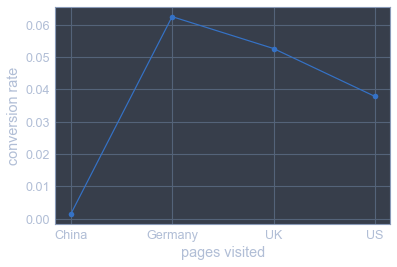

In [8]:
# calcualte the conversion rate for each country
# temp = (df
#  .groupby('country')
#  .agg(counts=('age', np.size), 
#       converted=('converted', lambda x: np.sum(x==1)))
#  .assign(conversion_rate=lambda df: df['converted'] / df['counts']))

temp = df.groupby('country')['converted'].mean()  # mean will give the conversion rate
 
fig, ax = plt.subplots()
ax.plot(temp.index, temp.values, 'o-')
ax.set_xlabel('pages visited')
ax.set_ylabel('conversion rate')

(array([1.25006e+05, 1.35764e+05, 4.77200e+04, 7.37900e+03, 3.23000e+02,
        6.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 17. ,  27.6,  38.2,  48.8,  59.4,  70. ,  80.6,  91.2, 101.8,
        112.4, 123. ]),
 <a list of 10 Patch objects>)

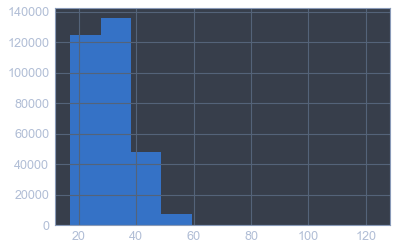

In [9]:
# distribution of age
fig, ax = plt.subplots()
ax.hist(df['age'])

In [10]:
df = df.loc[df['age']<=60]

Text(0, 0.5, 'conversion rate')

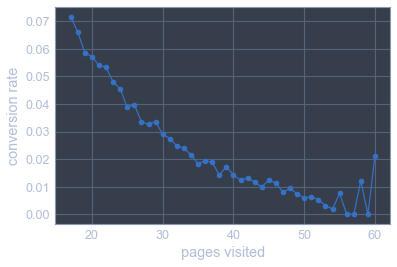

In [11]:
# calcualte the conversion rate for age
temp = df.groupby('age')['converted'].mean()

fig, ax = plt.subplots()
ax.plot(temp.index, temp.values, 'o-')
ax.set_xlabel('pages visited')
ax.set_ylabel('conversion rate')

In [12]:
df.groupby('new_user')['converted'].mean()

new_user
0    0.072029
1    0.014031
Name: converted, dtype: float64

In [13]:
df.groupby('source')['converted'].mean()

source
Ads       0.034499
Direct    0.028192
Seo       0.032905
Name: converted, dtype: float64

In [14]:
df.groupby('total_pages_visited')['converted'].mean()

total_pages_visited
1     0.000000
2     0.000228
3     0.000251
4     0.000780
5     0.001571
6     0.003439
7     0.006776
8     0.015248
9     0.033015
10    0.061090
11    0.123539
12    0.244672
13    0.400825
14    0.587521
15    0.740181
16    0.871818
17    0.923077
18    0.961219
19    0.989381
20    0.997531
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: converted, dtype: float64

the effects of different features are quite clear. We should be able to build a model with good prediction accuracy.

In [15]:
# for the numerical features, calculate their correlation with target
columns = ['age', 'new_user', 'total_pages_visited', 'converted']
corr = df[columns].corr(method='pearson')
corr

,age,new_user,total_pages_visited,converted
age,1.000000,0.012607,-0.046054,-0.089253
new_user,0.012607,1.000000,-0.082524,-0.152383
total_pages_visited,-0.046054,-0.082524,1.000000,0.529083
converted,-0.089253,-0.152383,0.529083,1.000000


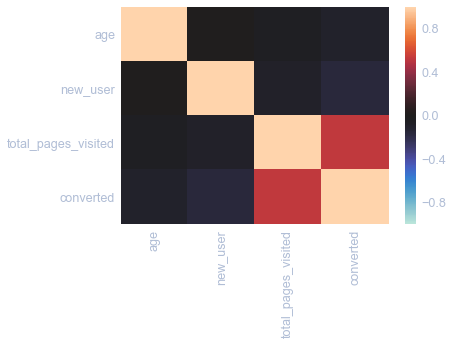

In [16]:
sns.heatmap(corr, center=0, vmin=-1, vmax=1)

In [17]:
# df.plot.bar(x='source', y='converted')

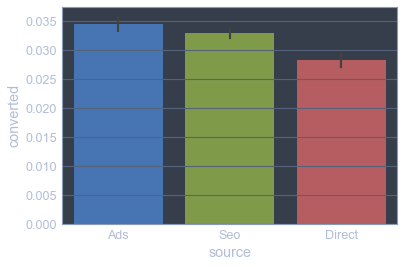

In [18]:
sns.barplot(x='source',y='converted',data=df)

In [19]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [20]:
data = pd.get_dummies(df)
data.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [21]:
# df_country = pd.get_dummies(df['country'])
# df = pd.concat([df, df_country], axis=1)
# df_source = pd.get_dummies(df['source'])
# df = pd.concat([df, df_source], axis=1)
# df.head()
target = 'converted'
features = data.columns.tolist() 
features.remove(target)
features

['age',
 'new_user',
 'total_pages_visited',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'source_Ads',
 'source_Direct',
 'source_Seo']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2)

In [23]:
df.shape[0]*0.03

9478.89

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()  # class_weight='balanced'
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=['not_converted', 'converted'])
print(report)
# clf.score(X_test,y_test)

cm = confusion_matrix(y_test, y_pred)


               precision    recall  f1-score   support

not_converted       0.99      1.00      0.99     61094
    converted       0.82      0.67      0.74      2099

     accuracy                           0.98     63193
    macro avg       0.91      0.83      0.87     63193
 weighted avg       0.98      0.98      0.98     63193



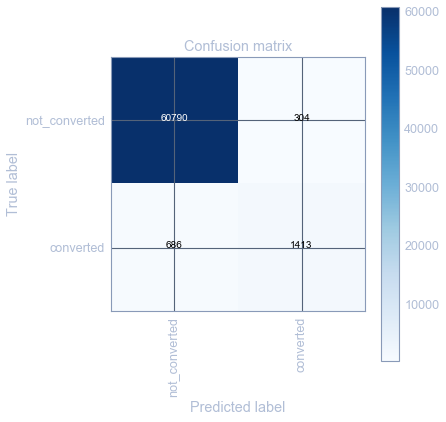

In [26]:
from helper_functions import plot_confusion_matrix
plot_confusion_matrix(cm, ['not_converted', 'converted'])

The accuracy on the test set is 98%, the baseline accuracy is:

In [30]:
1-sum(df['converted'])/len(df['converted'])

0.9677272338849802

# fit on balanced data set

In [35]:
from sklearn.utils import resample

data0 = data.loc[lambda df: df['converted']==0]
data1 = data.loc[lambda df: df['converted']==1]
len0, len1 = data0.shape[0], data1.shape[0]

data0_resampled = resample(data0, replace=False, n_samples=len1)

data_downsampled = pd.concat([data0_resampled, data1])


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_downsampled[features], 
                                                    data_downsampled[target], 
                                                    test_size=0.2)

y_train.groupby(y_train.values).size()

0    8123
1    8192
Name: converted, dtype: int64

In [40]:
clf1 = RandomForestClassifier()  # class_weight='balanced'
clf1.fit(X_train, y_train)

print(clf1.score(X_train, y_train))
print(clf1.score(X_test, y_test))

0.965491878639289
0.9281686687913704


## use cross validation to optimize hyper-parameters

In [50]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(300, 600, 100), 
              'max_depth':[4, 5, 6]}
clf_best = GridSearchCV(rf, param_grid, cv=5, refit=True, n_jobs=-1)
clf_best.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [51]:
pd.DataFrame(clf_best.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,2.396750,0.022501,0.158657,0.012510,6,300,"{'max_depth': 6, 'n_estimators': 300}",0.945143,0.934416,0.938707,0.942997,0.938707,0.939994,0.003740,1
8,3.580578,0.560334,0.214066,0.050870,6,500,"{'max_depth': 6, 'n_estimators': 500}",0.944223,0.935336,0.939626,0.942078,0.937174,0.939687,0.003211,2
7,3.083927,0.031776,0.217107,0.007265,6,400,"{'max_depth': 6, 'n_estimators': 400}",0.944223,0.934110,0.938400,0.942078,0.938400,0.939442,0.003476,3
5,3.654159,0.011182,0.244632,0.013215,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.944223,0.933497,0.939933,0.939933,0.939013,0.939320,0.003429,4
3,2.242614,0.057818,0.151112,0.010453,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.943917,0.930432,0.941158,0.940239,0.939013,0.938952,0.004556,5
4,2.868515,0.021090,0.201011,0.013364,5,400,"{'max_depth': 5, 'n_estimators': 400}",0.944223,0.931045,0.939320,0.939626,0.939320,0.938707,0.004260,6
2,3.304906,0.039876,0.236611,0.014931,4,500,"{'max_depth': 4, 'n_estimators': 500}",0.942078,0.928900,0.940852,0.936868,0.937787,0.937297,0.004614,7
1,2.638707,0.021049,0.179896,0.004688,4,400,"{'max_depth': 4, 'n_estimators': 400}",0.942384,0.927980,0.939320,0.936868,0.938707,0.937052,0.004871,8
0,2.091419,0.058859,0.121026,0.010110,4,300,"{'max_depth': 4, 'n_estimators': 300}",0.943304,0.930126,0.936868,0.936868,0.938094,0.937052,0.004200,9


In [54]:
# check the classification score of the model trained with balanced data
clf_best.score(X_test, y_test)
y_test_pred = clf_best.predict(X_test)
report = classification_report(y_test, y_test_pred, labels=[0, 1], target_names=['not_converted', 'converted'])
print(report)

               precision    recall  f1-score   support

not_converted       0.94      0.94      0.94      2074
    converted       0.94      0.94      0.94      2005

     accuracy                           0.94      4079
    macro avg       0.94      0.94      0.94      4079
 weighted avg       0.94      0.94      0.94      4079



In [55]:
y_all = data[target]
X_all = data[features]
y_all_pred = clf_best.predict(X_all)
report = classification_report(y_all, y_all_pred, labels=[0, 1], target_names=['not_converted', 'converted'])
print(report)

               precision    recall  f1-score   support

not_converted       1.00      0.94      0.97    305766
    converted       0.34      0.94      0.50     10197

     accuracy                           0.94    315963
    macro avg       0.67      0.94      0.73    315963
 weighted avg       0.98      0.94      0.95    315963



so it seems using downsampling to achieve balanced dataset does NOT necessarily improve accuracy, not even for the minority class. 

# Feature Importance

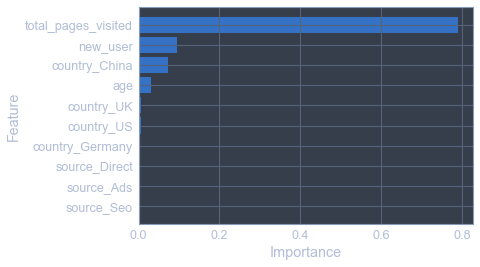

In [67]:
importance = pd.Series(data=clf_best.best_estimator_.feature_importances_, 
                       index = features).sort_values(ascending=True)

from helper import plot_barh

plot_barh(importance)

The most important feature is total_pages_visited. However, it is difficult for the company to cause people to visit more pages. Also, people probably visit more pages to buy things anyway, so it is probably caused by the action of a purchase, rather than causing a purchase.

Now I will remove `total_pages_visited` since it is now really helpful to the company.

The first split of the decision tree is whether or not it is a new user. Thus, the site should try to incentivize older users to come back. The next split of the tree is on country, and the tree is split on the user not being from China. Since China has a large population, the site should try to increase the number of Chinese visitors. The third level is split on age. Basically, the site works better for young users (less than about 30 years of age). Thus, the site should advertise towards young people to maximize the conversion rate of their target audience.

# use random forest in H2O package 

In [9]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.frame import H2OFrame
from h2o.grid.grid_search import H2OGridSearch

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,40 mins 56 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,7 days
H2O_cluster_name:,H2O_from_python_IvanEmily_0fsrsk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [6]:
df.head()
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [10]:
# df.head()

h2o_df = H2OFrame(df)
h2o_df['new_user'] = h2o_df['new_user'].asfactor()
h2o_df['converted'] = h2o_df['converted'].asfactor()

h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,country,age,new_user,source,total_pages_visited,converted
type,enum,int,enum,enum,int,enum
mins,,17.0,,,1.0,
mean,,30.569857685009246,,,4.872966476913342,
maxs,,123.0,,,29.0,
sigma,,8.271801801807747,,,3.3411037579481966,
zeros,,0,,,0,
missing,0,0,0,0,0,0
0,UK,25.0,1,Ads,1.0,0
1,US,23.0,1,Seo,5.0,0
2,US,28.0,1,Seo,4.0,0


In [14]:
# train test split
train, test = h2o_df.split_frame(ratios=[0.80])
features = h2o_df.columns
target = 'converted'
features.remove(target)

In [15]:
model = H2ORandomForestEstimator(balance_classes=True, 
                                 ntrees=200, 
                                 max_depth=6)
model.train(x=features,
            y=target,
            training_frame=train,
            validation_frame=test)

drf Model Build progress: |███████████████████████████████████████████████| 100%


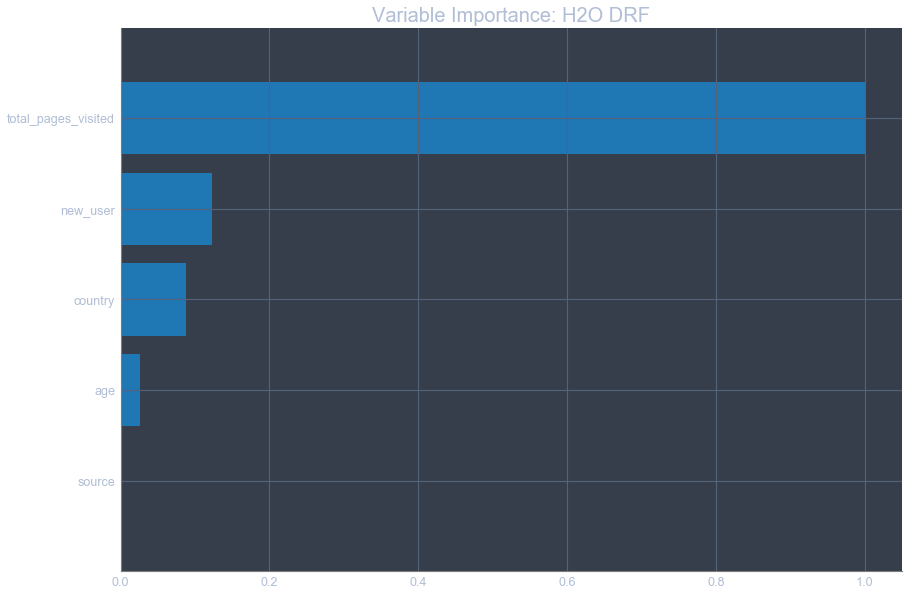

In [16]:
model.varimp_plot()

In [22]:
importance

,variable,relative_importance,scaled_importance,percentage
0,total_pages_visited,1.233977e+07,1.000000,0.807903
1,new_user,1.518760e+06,0.123078,0.099435
2,country,1.083616e+06,0.087815,0.070946
3,age,3.278706e+05,0.026570,0.021466
4,source,3.812834e+03,0.000309,0.000250


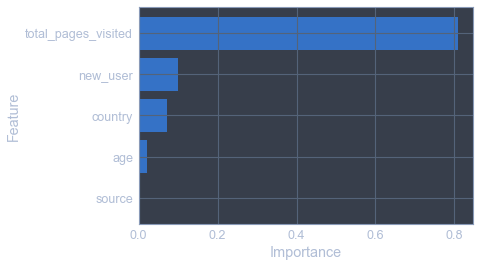

In [23]:
import helper
importance = model.varimp(use_pandas=True).set_index('variable')
helper.plot_barh(importance['percentage'])


In [58]:
y_test_pred = model.predict(test[features])
y_train_pred = model.predict(train[features])
y_train_pred.head()

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.998671,0.00132928
0,0.998601,0.00139853
0,0.998657,0.00134304
0,0.999882,0.000118061
0,0.997029,0.00297135
0,0.997314,0.0026865
0,0.999739,0.00026085
0,0.995992,0.00400819
0,0.996417,0.00358283
0,0.996294,0.00370612


In [61]:
y_test_pred_class = y_test_pred.as_data_frame()['predict']
y_test = test.as_data_frame()[target]
y_train = train.as_data_frame()[target]
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred_class, labels=[0, 1], target_names=['not converted', 'converted']))

               precision    recall  f1-score   support

not converted       0.99      0.99      0.99     61389
    converted       0.77      0.77      0.77      2101

     accuracy                           0.98     63490
    macro avg       0.88      0.88      0.88     63490
 weighted avg       0.98      0.98      0.98     63490



In [37]:
h2o_df.as_data_frame().dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

(0.9847201725555532, 0.9849275415982361)

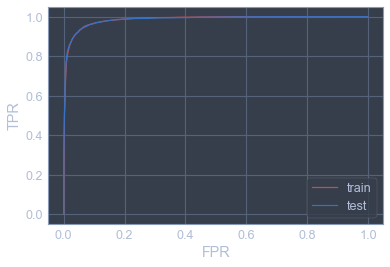

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
y_test_pred_prob = y_test_pred.as_data_frame()['p1']
y_train_pred_prob = y_train_pred.as_data_frame()['p1']
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_prob, pos_label=1)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_prob, pos_label=1)



fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, 'r-', label='train')
ax.plot(fpr_test, tpr_test, 'b-', label='test')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend()
roc_auc_score(y_test, y_test_pred_prob), roc_auc_score(y_train, y_train_pred_prob)

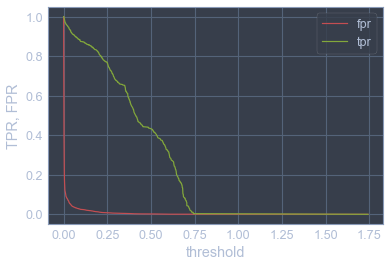

In [57]:
fig, ax = plt.subplots()
ax.plot(thresholds, fpr, 'r-', label='fpr')
ax.plot(thresholds, tpr, 'g-', label='tpr')
ax.set_xlabel('threshold')
ax.set_ylabel('TPR, FPR')
ax.legend()